# Import

In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score


# Dataset

In [3]:
data = pd.read_csv("bank-marketing.csv")

In [9]:
data.shape

(45211, 23)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

## Identifying Numerical and Categorical Features

In [11]:
categorical_cols=data.select_dtypes(include='object') #contains only categorical columns
for col in categorical_cols.columns:
    print("Unique values in column:",col )
    print(categorical_cols[col].unique())
    print(sep = '\n' )
    print("value counts in column",col )
    print(categorical_cols[col].value_counts())
    print("_________________________________")

Unique values in column: eligible
['Y' 'N']

value counts in column eligible
Y    43380
N     1831
Name: eligible, dtype: int64
_________________________________
Unique values in column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

value counts in column job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
_________________________________
Unique values in column: marital
['married' 'single' 'divorced']

value counts in column marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
_________________________________
Unique values in column: education
['tertiary' 'secondary' 'unknown' 'primary']

value counts in

In [12]:
numeric_cols=data.select_dtypes(include=np.number)
numeric_cols.head()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
0,58,5,100000,2143,5,261,1,-1,0,0
1,44,4,60000,29,5,151,1,-1,0,0
2,33,3,120000,2,5,76,1,-1,0,0
3,47,4,20000,1506,5,92,1,-1,0,0
4,33,3,0,1,5,198,1,-1,0,0


# Data Cleaning

## Finding null values


In [8]:
def null_values(df):
    mask = df.isnull()

    has_null = mask.any().any()
    if has_null:
        null_locations = pd.DataFrame({'row': mask.index, 'column': mask.columns}).where(mask)
        print("Null values found at:")
        print(null_locations)
    else:
        print("No Null Values Found in Dataset")

null_values(data)

No Null Values Found in Dataset


## Replacing Values
Based on Research pdays is the number of days that passed by after the client was last contacted from a previous campaign and A value of -1 in the 'pdays' attribute indicates that the client was not previously contacted in any of the previous campaigns.
Replacing -1 --> 0

In [15]:
numeric_cols['pdays'].unique() ##before replacing

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [16]:
data.pdays = data.pdays.replace(-1, 0)
numeric_cols=data.select_dtypes(include=np.number)
numeric_cols['pdays'].unique()

array([  0, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

# Exploratory Data Analysis


## Understanding Statistics of Numerical Column from dataset

In [19]:
numeric_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
age group,45211.0,3.645861,1.083271,1.0,3.0,3.0,4.0,9.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,41.015195,99.792615,0.0,0.0,0.0,0.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
response,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


IMP OBSERVATION
1. For pdays and previous, quartiles Q1,Q2, and Q3 = 0 which signifies that about 75% of data has customers who are
not contacted before this campaign. --> Highly positively skewed.
2. Most of the numerical features are skewed and those outliers has to be treated.

## Treating Outliers

In [20]:
def replace_outlier(df,col,method='quartile',strategy='mean'): ##as median is the best rep we gave median as strategy

    col_data=df[col]

    if method=='quartile':

        q1=df[col].quantile(0.25)
        q2=df[col].quantile(0.5)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lower_limit=q1-1.5*iqr
        upper_limit=q3+1.5*iqr
        col_mean=df[col].mean()
    elif method=='std_dev':

        col_mean=df[col].mean()
        col_std_dev=df[col].std()
        lwr_limit=col_mean-2*col_std_dev
        upr_limit=col_mean+2*col_std_dev


    outliers=df.loc[(col_data < lower_limit)|(col_data > upper_limit),col]
    outliers_density=len(outliers)/len(df)

    if strategy=='median':

        df.loc[(col_data < lower_limit)|(col_data > upper_limit),col]=q2

    elif strategy=='mean':

        df.loc[(col_data < lower_limit)|(col_data > upper_limit),col]=col_mean

    return df

In [21]:
def odt_plots(df,col):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(14,7))

    #box plot for descriptive stats

    sns.boxplot(df[col],ax=ax1,color='red')
    ax1.set_title(col+ '  '+'Boxplot')
    ax1.set_xlabel('Boxplot')
    ax1.set_ylabel('Values')



    #plotting histogram with outliers

    sns.distplot(df[col],ax=ax2,color='blue')
    ax2.set_title(col+ '  '+'Histogram with outliers')
    ax2.set_xlabel('Histogram')
    ax2.set_ylabel('Values')

    #plotting histogram after treating outliers

    y = replace_outlier(df,col)

    sns.distplot(y[col],ax=ax3,color='green')
    ax3.set_title(col+ '  '+'Histogram without outliers')
    ax3.set_xlabel('Histogram')
    ax3.set_ylabel('Values')

C:\Users\Devang\AppData\Local\Temp\ipykernel_9960\2251579411.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax2,color='blue')
C:\Users\Devang\AppData\Local\Temp\ipykernel_9960\2251579411.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y[col],ax=ax3,color='green')
C:\Users\D

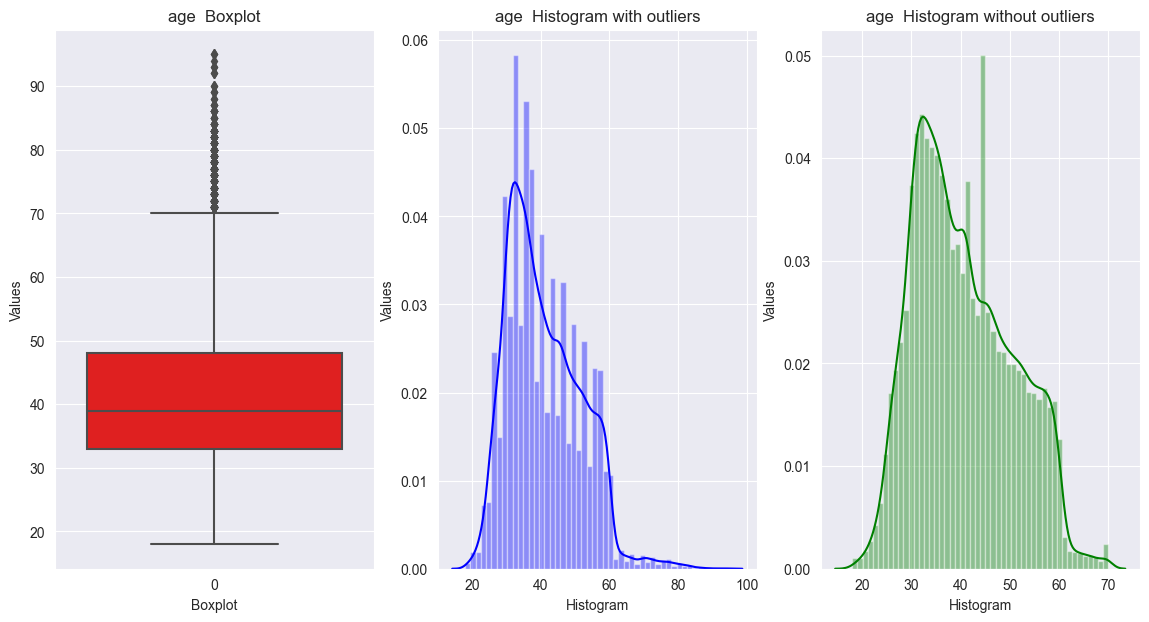

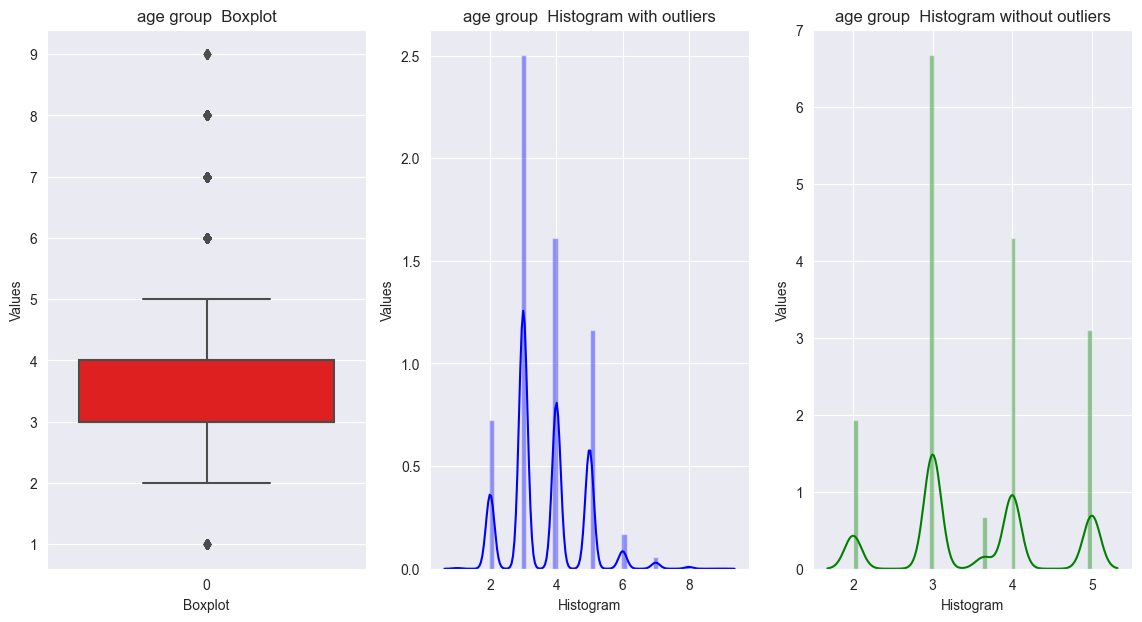

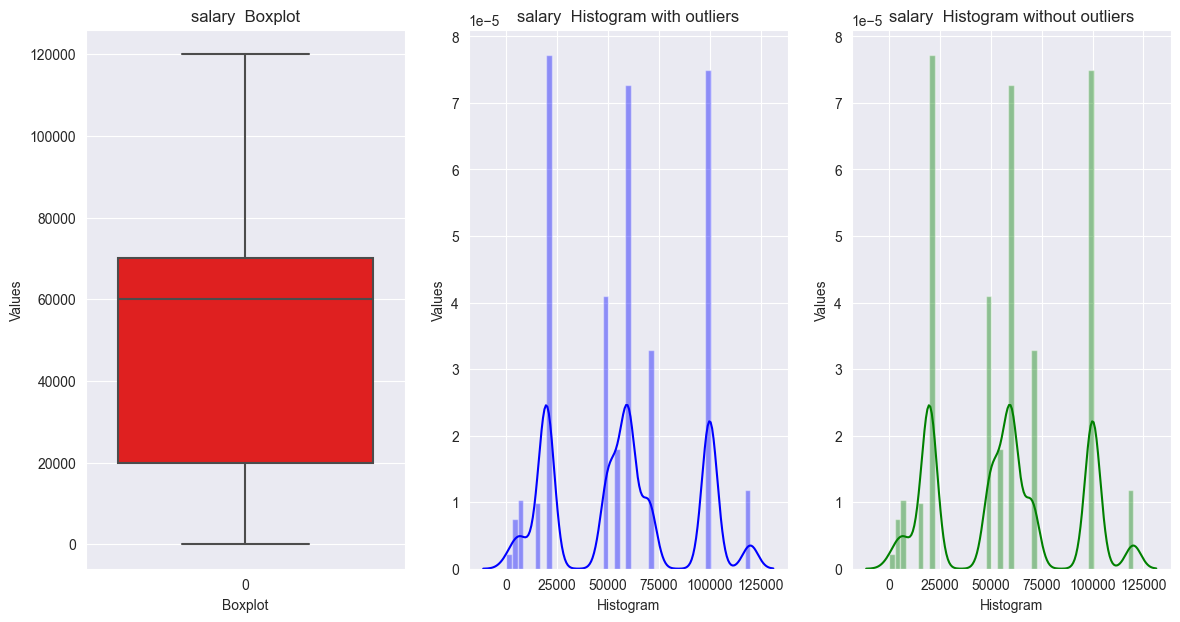

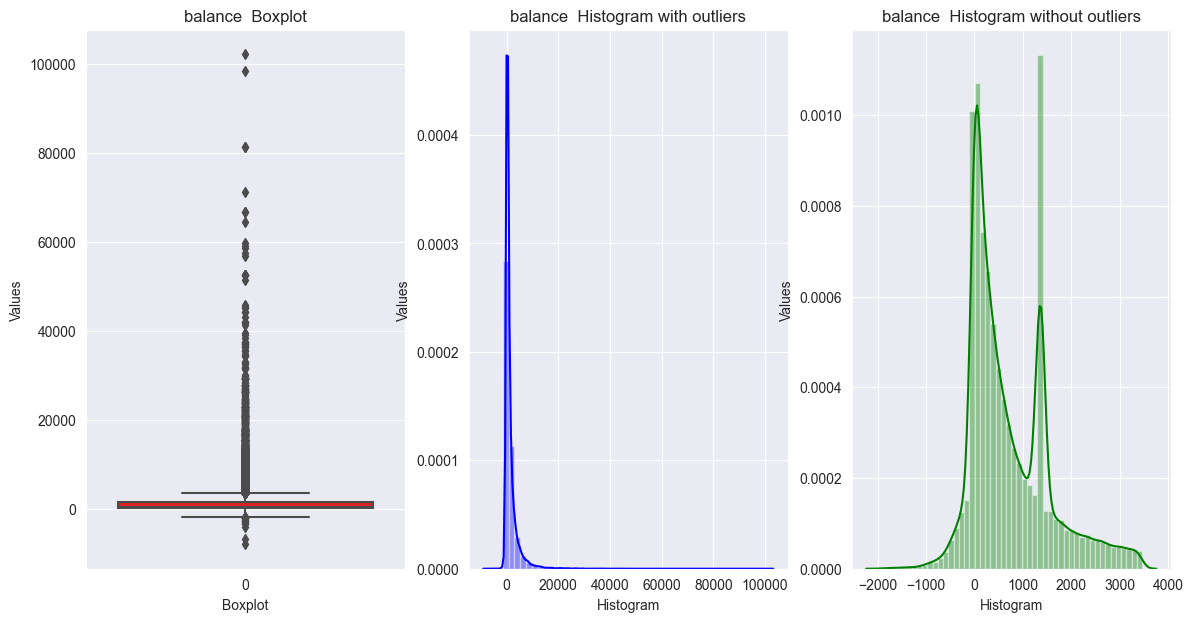

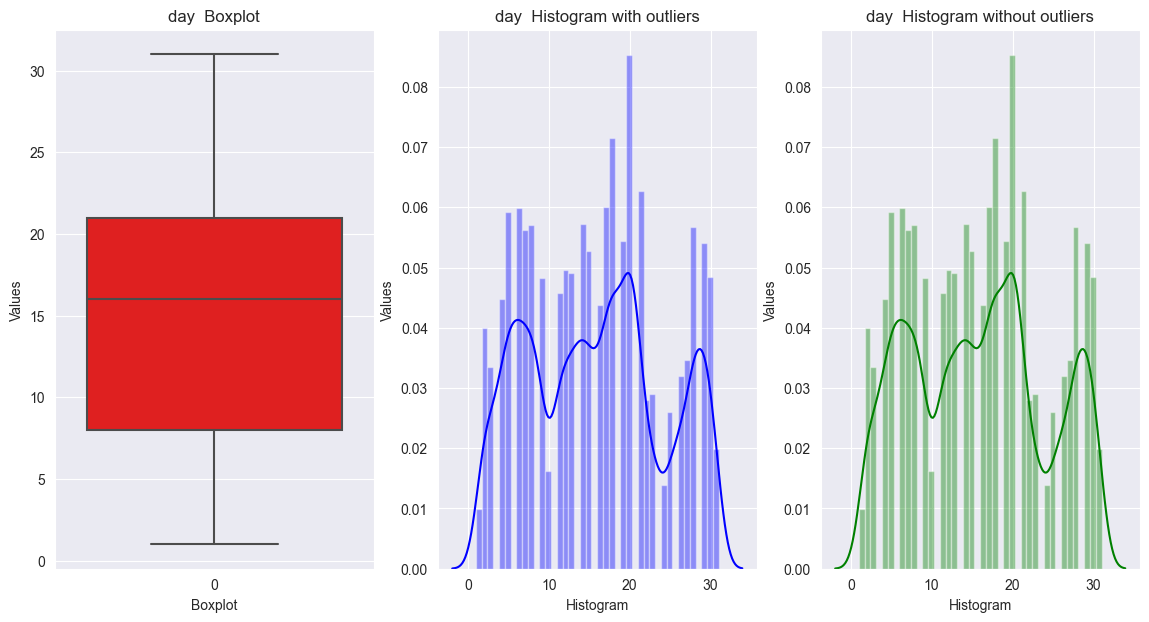

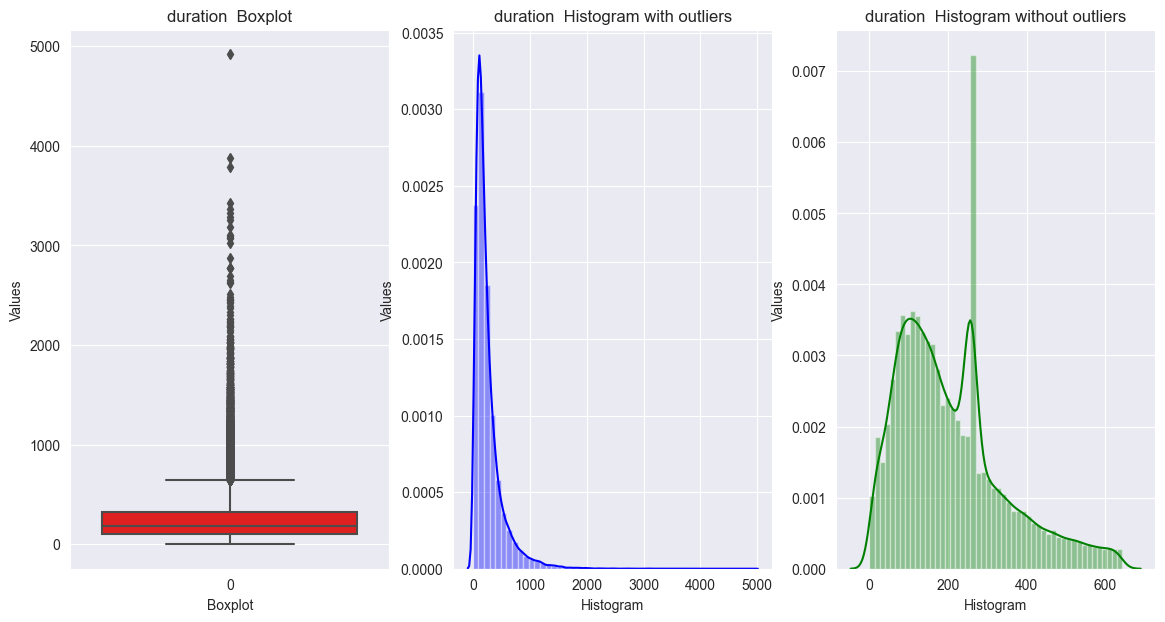

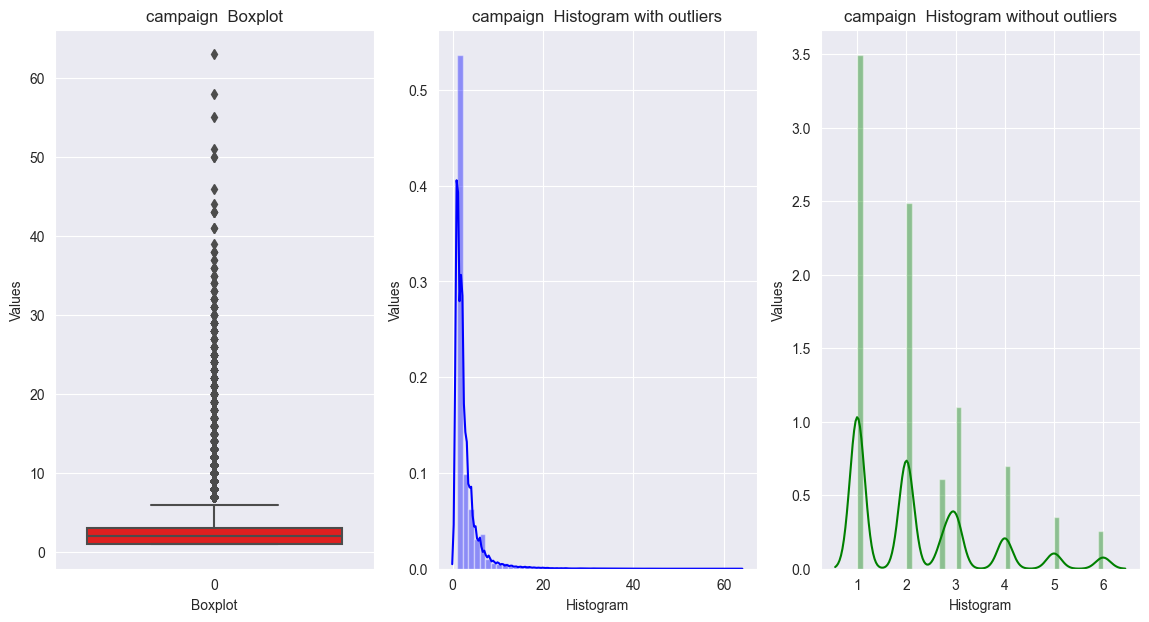

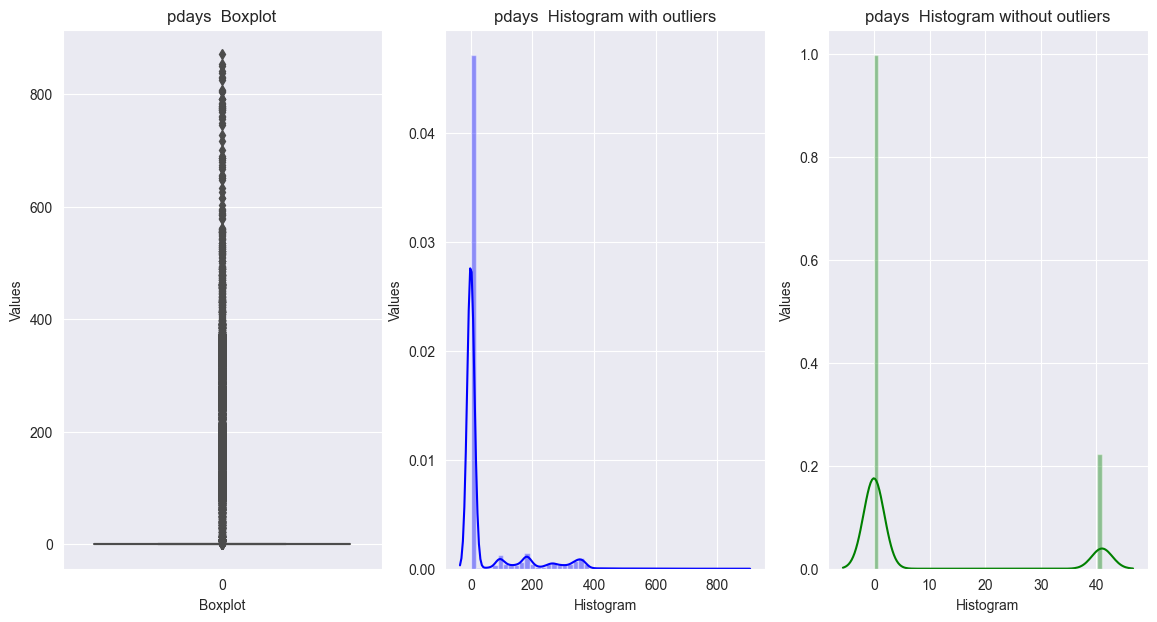

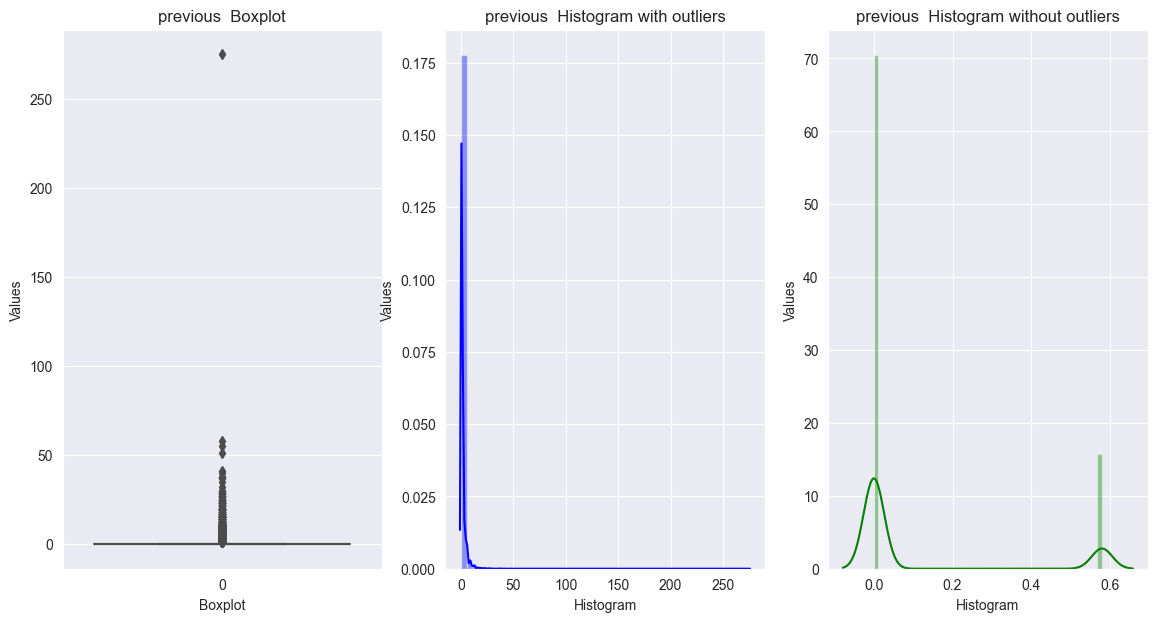

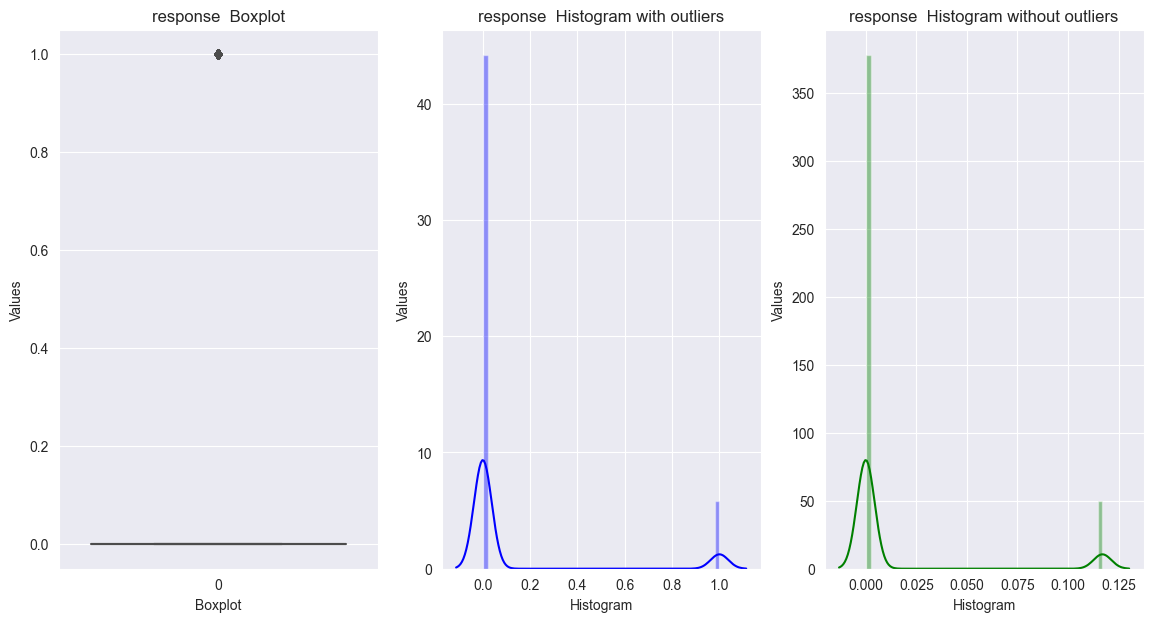

In [22]:
for col in numeric_cols.columns:
    odt_plots(numeric_cols,col)

## Relationship Study between duration and target feature


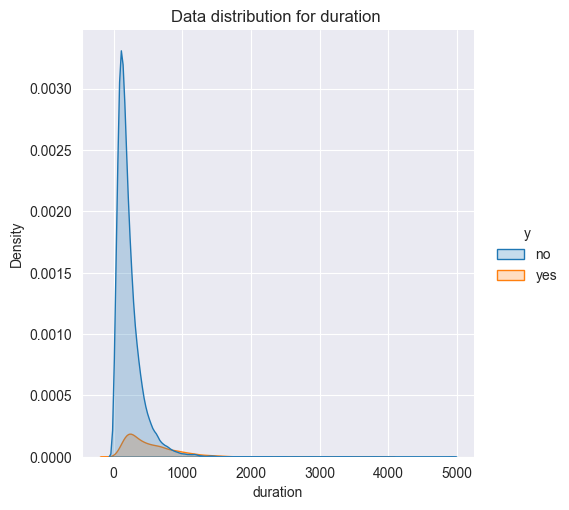

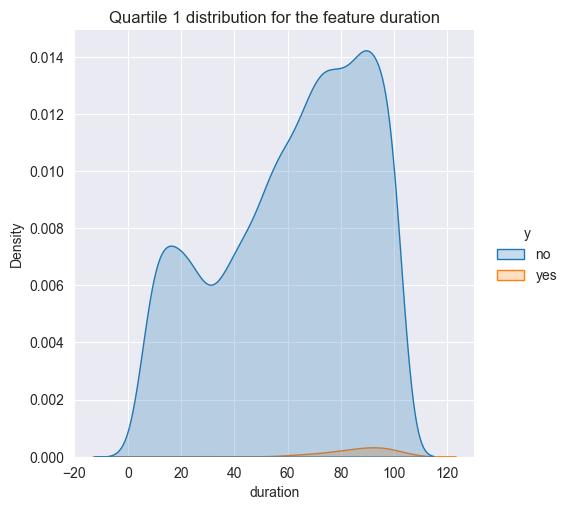

In [25]:
def rel_duration_target(df):

    add_column=df[['y']]
    test_df=df.select_dtypes(include=np.number)
    test_df=test_df.join(add_column)
    sns.displot(test_df ,x="duration", hue="y", kind="kde", fill=True)
    plt.title("Data distribution for duration ")
    lower_limit=test_df['duration'].quantile(0.25)
    q1=test_df.loc[(test_df['duration'] < lower_limit)]
    sns.displot(q1 ,x="duration", hue="y", kind="kde", fill=True)
    plt.title("Quartile 1 distribution for the feature duration")
rel_duration_target(data)


Out of 45211 customers, 25% of (approximately 11300) customers have attended campaign phone calls having call duration
from 0 to 120 secs.

If the customer’s call duration is less than a minute, it is very obvious that there is no chance a customer will agree to place deposit.

## Relationship study between campaign and target feature

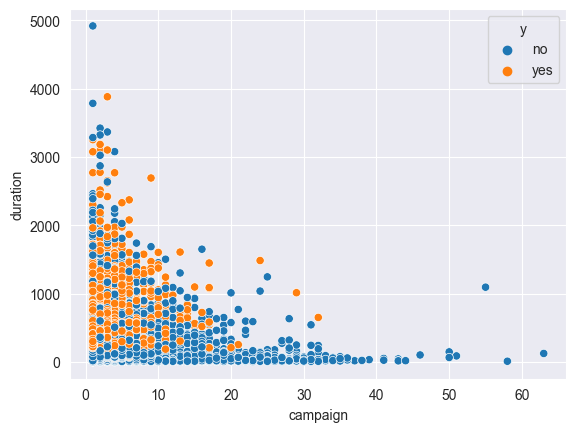

In [26]:
def rel_camp_target(df):
    add_column=df[['y']]
    test_df=df.select_dtypes(include=np.number)
    test_df=test_df.join(add_column)
    sns.scatterplot(x='campaign',y='duration',data=test_df,hue='y')
rel_camp_target(data)

Data show customer subscribing to term deposit chances are very less when the number of contacts performed is more
than 32.

Hence the bank no need to focus on customers who are already contacted at least 32 times.

## Relationship Study among all numerical datatypes variables
--> Checking Multicollinearity

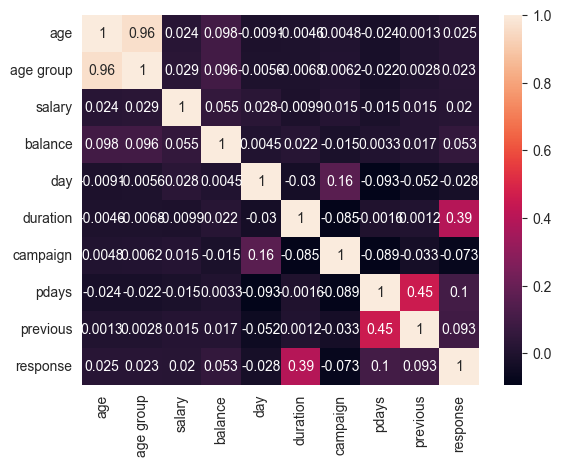

In [28]:
def rel_all_num(df):
    numeric_col = data.select_dtypes(include=np.number)
    df_corr=numeric_col.corr()
    sns.heatmap(df_corr,annot=True)
rel_all_num(data)

It is obvious that age and age group will have high correlation. As age group is dervied from age. Further when
constructing model age column will be removed from dataframe.

# Defining Research Area and Analyzing the Past Scenerio

## Problem Statement
The bank wants to increase the effectiveness of its telemarketing campaign and predict customers' responses to future marketing campaigns. However, currently, the bank does not have a granular understanding of its customer base, which makes it challenging to identify the most responsive customers and establish a target customer profile. As a result, the bank's marketing efforts may not be reaching the right customers, leading to inefficiencies and reduced customer satisfaction.

Therefore, the objective of this project is to develop a predictive model that can analyze customer features, such as demographics and transaction history, to identify which type of customers is more likely to make term deposits. This will allow the bank to focus its marketing efforts on the most responsive customers and establish a target customer profile for future marketing plans. Ultimately, this project aims to increase the effectiveness of the bank's telemarketing campaign, improve customer satisfaction, and secure deposits more efficiently.

## Selecting attributes based on problem statement

In [32]:
new_data = data.iloc[:, [1,2,3,4,5,8,10,11,12,16,18,19,22]]
new_data.columns

Index(['age group', 'eligible', 'job', 'salary', 'marital', 'targeted',
       'balance', 'housing', 'loan', 'duration', 'pdays', 'previous',
       'response'],
      dtype='object')

## Multivariate Analysis
Understanding the categorical attributes in the dataset.

In [33]:
def eda(df,target):
    ind_var=df.drop(target,axis=1)
    for col in ind_var.columns:
        #sns.countplot(x=col,hue=target,data = data)
            pd.crosstab(ind_var[col],data[target]).plot(kind="bar",stacked=False)

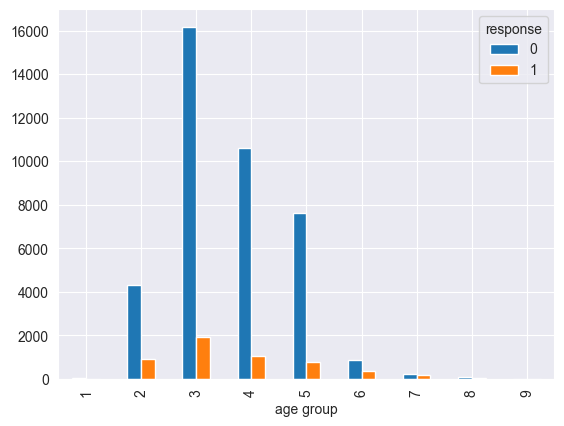

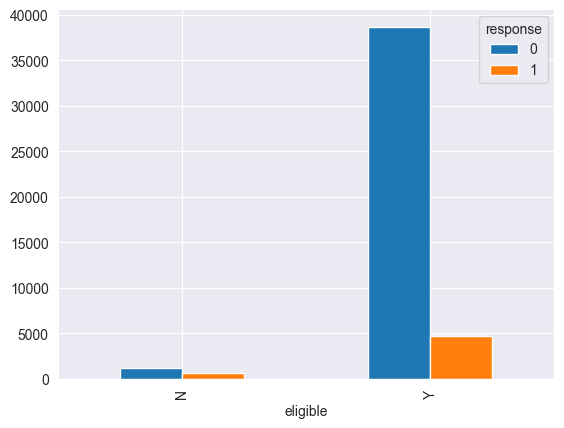

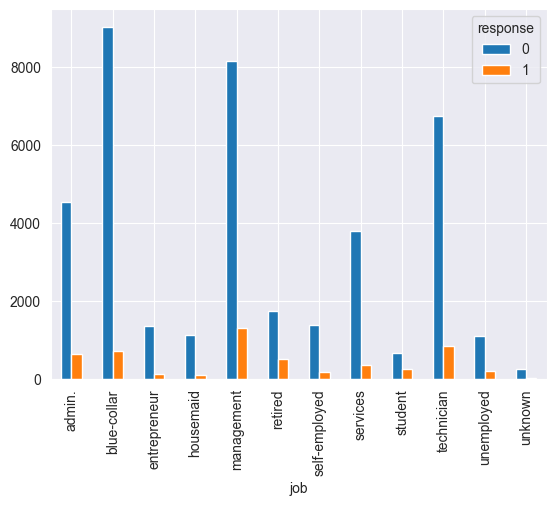

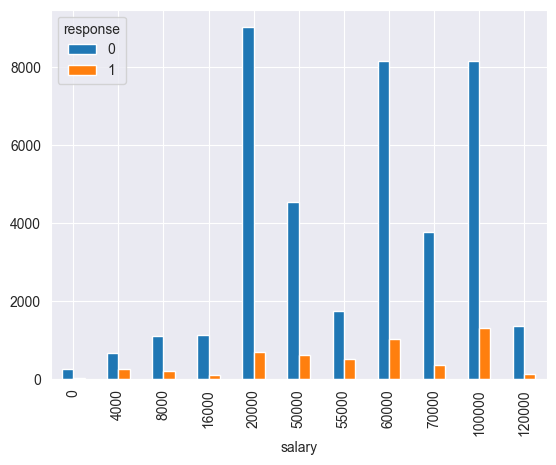

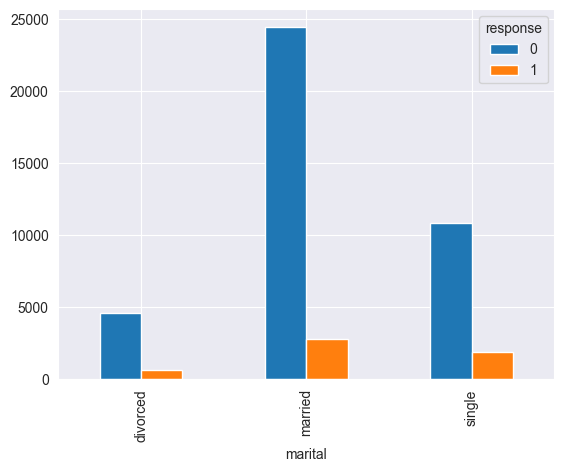

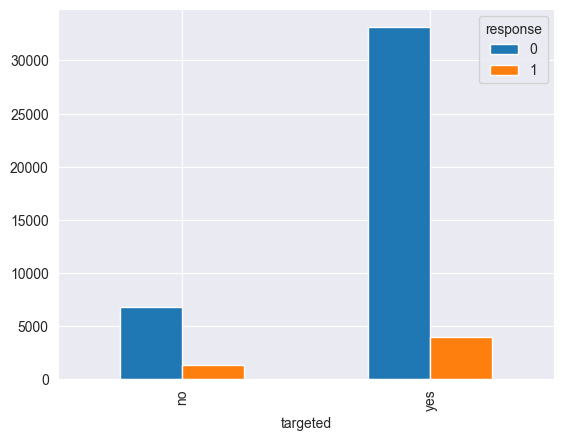

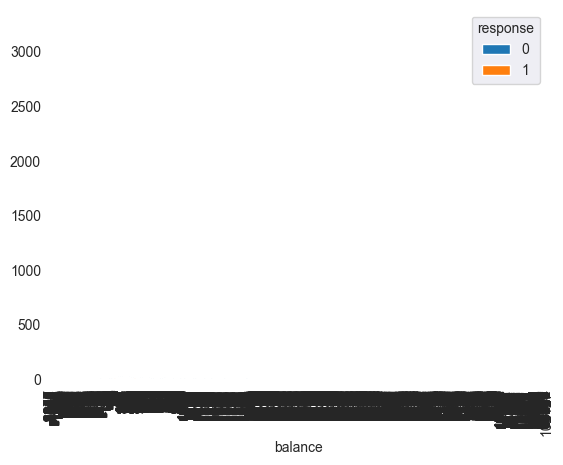

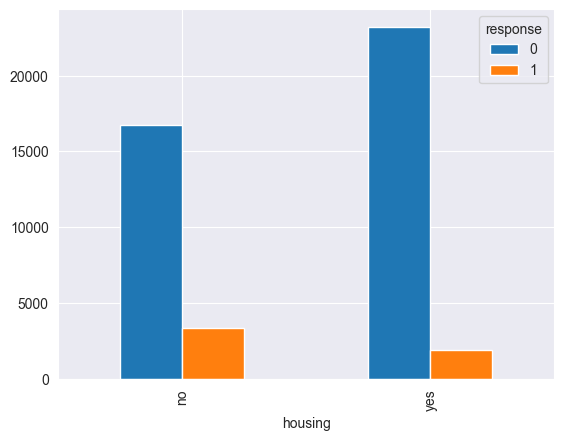

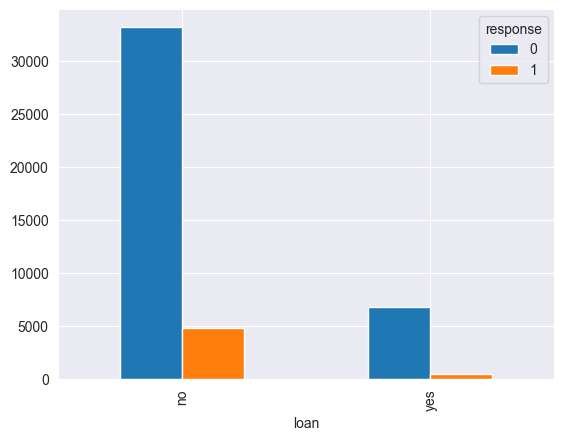

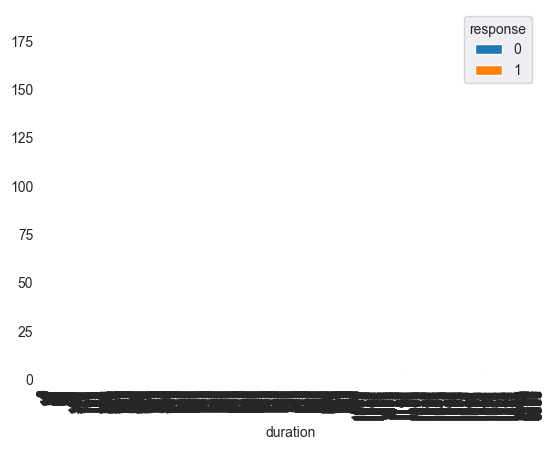

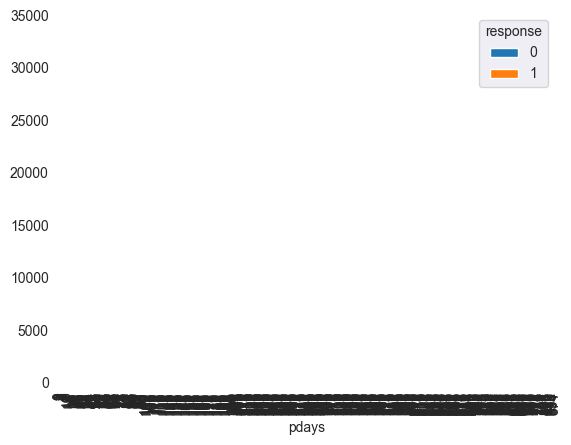

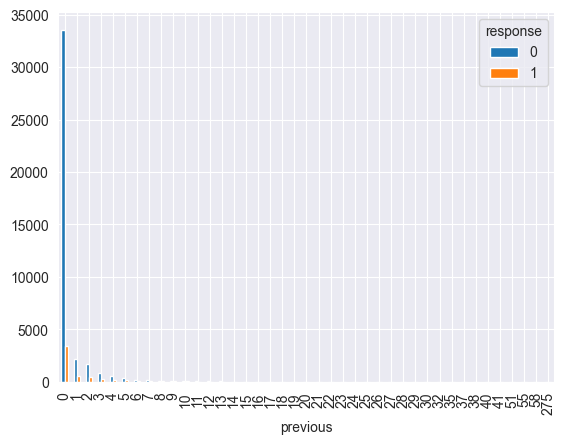

In [37]:
eda(new_data,'response')

Data shows customer working in admin jobs, blue collar jobs and technicians are more likely to opt for term deposit.

customers having high school graduation, university graduation are likely to opt for term deposit.

Data shows campaign is conducted majorly for customers with no personal loans and no credit cards.

campaign is conducted effectively in month of May and for customers having poutcome as non-existent.

# Feature scaling

## Standardization of Numerical Attributes

In [58]:
new_data_num = new_data.iloc[:,[0,3,6,9,10,11]]

In [147]:
# def scale_num(df_num):
scalar=MinMaxScaler()
column=new_data_num.columns
numeric_cols=scalar.fit_transform(new_data_num)
df_numeric=pd.DataFrame(numeric_cols,columns=column)
    # return df_numeric,scalar

In [148]:
# result = scale_num(new_data_num)
# data_num = result.head(2)
# data_num
df_numeric.head(2)

,age group,salary,balance,duration,pdays,previous
0,0.500,0.833333,0.092259,0.053070,0.0,0.0
1,0.375,0.500000,0.073067,0.030704,0.0,0.0


## Label Encoding of Categorical Attributes

In [61]:
new_data_cat = new_data.iloc[:,[1,2,4,5,7,8,12]]
new_data_cat.columns

Index(['eligible', 'job', 'marital', 'targeted', 'housing', 'loan',
       'response'],
      dtype='object')

In [107]:
def label_cat(df_cat):
    le=LabelEncoder()
    df_categorical=pd.DataFrame()
    df_label=pd.DataFrame()
    for col in df_cat.columns:
        df_categorical[col]=le.fit_transform(df_cat[col])
        print(le.classes_)
        # df_label[col] = le.classes_
        # print(df_label)
        # print(f"Length of unique values in {col}: {len(df_cat[col].unique())}")
        # print(f"Length of labels in {col}: {len(df_label[col])}")
    return df_categorical
result_cat = label_cat(new_data_cat)
result_cat

['N' 'Y']
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single']
['no' 'yes']
['no' 'yes']
['no' 'yes']
[0 1]


,eligible,job,marital,targeted,housing,loan,response
0,1,4,1,1,1,0,0
1,1,9,2,1,1,0,0
2,1,2,1,1,1,1,0
3,1,1,1,0,1,0,0
4,1,11,2,0,0,0,0
...,...,...,...,...,...,...,...
45206,1,9,1,1,0,0,1
45207,0,5,0,1,0,0,1
45208,0,5,1,1,0,0,1
45209,1,1,1,1,0,0,0


## Final Dataset for Constructing Model

In [149]:
final_data = pd.concat([df_numeric,result_cat],axis=1)
final_data.head()

,age group,salary,balance,duration,pdays,previous,eligible,job,marital,targeted,housing,loan,response
0,0.500,0.833333,0.092259,0.053070,0.0,0.0,1,4,1,1,1,0,0
1,0.375,0.500000,0.073067,0.030704,0.0,0.0,1,9,2,1,1,0,0
2,0.250,1.000000,0.072822,0.015453,0.0,0.0,1,2,1,1,1,1,0
3,0.375,0.166667,0.086476,0.018707,0.0,0.0,1,1,1,0,1,0,0
4,0.250,0.000000,0.072812,0.040260,0.0,0.0,1,11,2,0,0,0,0


# Model Building

## Splitting Data into Predictor and Target Variable

In [70]:
X = final_data.iloc[:, :-1].values
y = final_data.iloc[:, -1].values

## Splitting Data into Training and Testing set

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Navie Bayes Model

In [72]:
from sklearn.naive_bayes import BernoulliNB
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)


BernoulliNB()

In [74]:
y_pred = nb_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [75]:
X_test

array([[0.25      , 0.83333333, 0.08554101, ..., 1.        , 1.        ,
        0.        ],
       [0.25      , 0.58333333, 0.07050642, ..., 1.        , 1.        ,
        0.        ],
       [0.375     , 0.16666667, 0.06911735, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.25      , 0.5       , 0.07280337, ..., 1.        , 0.        ,
        0.        ],
       [0.375     , 0.83333333, 0.07857752, ..., 1.        , 1.        ,
        0.        ],
       [0.375     , 0.83333333, 0.11593703, ..., 1.        , 0.        ,
        0.        ]])

In [138]:
X_test[58]

array([6.25000000e-01, 4.58333333e-01, 1.14311913e-01, 2.96868646e-02,
       6.42939150e-02, 3.63636364e-03, 0.00000000e+00, 5.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [152]:
X_test[115]

array([0.625     , 0.5       , 0.07285784, 0.04270028, 0.20895522,
       0.00727273, 0.        , 6.        , 0.        , 0.        ,
       1.        , 0.        ])

In [213]:
from sklearn.preprocessing import StandardScaler

# val = scaler.transform()
#
# print(nb_classifier.predict(([[scalar.transform([[5,50000,2143,261,0,0]]),0,5,0,1,0,0]])))
input_numerical = scalar.transform([[5, 80000, 16300, 7070, 20, 100]])
input_categorical = [1, 4, 1, 1, 0, 0]
input_data = np.concatenate((input_numerical, [input_categorical]), axis=1)
print(input_data)
print(nb_classifier.predict(input_data))

[[0.5        0.66666667 0.22078877 1.43757625 0.02296211 0.36363636
  1.         4.         1.         1.         0.         0.        ]]
[0]


C:\Users\Devang\PycharmProjects\collegework\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [123]:
probs = nb_classifier.predict_proba(X_test)
for i in range(len(X_test)):
    print("Instance {}: Class 0 probability: {:.2f}, Class 1 probability: {:.2f}".format(i, probs[i][0], probs[i][1]))

Instance 0: Class 0 probability: 0.96, Class 1 probability: 0.04
Instance 1: Class 0 probability: 0.96, Class 1 probability: 0.04
Instance 2: Class 0 probability: 0.95, Class 1 probability: 0.05
Instance 3: Class 0 probability: 0.85, Class 1 probability: 0.15
Instance 4: Class 0 probability: 0.98, Class 1 probability: 0.02
Instance 5: Class 0 probability: 0.93, Class 1 probability: 0.07
Instance 6: Class 0 probability: 0.96, Class 1 probability: 0.04
Instance 7: Class 0 probability: 0.73, Class 1 probability: 0.27
Instance 8: Class 0 probability: 0.91, Class 1 probability: 0.09
Instance 9: Class 0 probability: 0.95, Class 1 probability: 0.05
Instance 10: Class 0 probability: 0.96, Class 1 probability: 0.04
Instance 11: Class 0 probability: 0.91, Class 1 probability: 0.09
Instance 12: Class 0 probability: 0.53, Class 1 probability: 0.47
Instance 13: Class 0 probability: 0.91, Class 1 probability: 0.09
Instance 14: Class 0 probability: 0.68, Class 1 probability: 0.32
Instance 15: Class 0

In [215]:
accuracy_nb = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_nb)

Accuracy: 0.8807396266477926


## Decision Tree Model

In [220]:
from sklearn.tree import DecisionTreeClassifier
d_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4)
d_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [221]:
print(d_classifier.predict(input_data))

[1]


[Text(0.5, 0.9, 'X[3] <= 0.092\nentropy = 0.52\nsamples = 33908\nvalue = [29944, 3964]'),
 Text(0.25, 0.7, 'X[3] <= 0.026\nentropy = 0.37\nsamples = 29142\nvalue = [27069, 2073]'),
 Text(0.125, 0.5, 'X[3] <= 0.016\nentropy = 0.119\nsamples = 11688\nvalue = [11499, 189]'),
 Text(0.0625, 0.3, 'X[3] <= 0.012\nentropy = 0.033\nsamples = 5542\nvalue = [5523, 19]'),
 Text(0.03125, 0.1, 'entropy = 0.018\nsamples = 3584\nvalue = [3578, 6]'),
 Text(0.09375, 0.1, 'entropy = 0.058\nsamples = 1958\nvalue = [1945, 13]'),
 Text(0.1875, 0.3, 'X[10] <= 0.5\nentropy = 0.183\nsamples = 6146\nvalue = [5976, 170]'),
 Text(0.15625, 0.1, 'entropy = 0.261\nsamples = 2898\nvalue = [2770, 128]'),
 Text(0.21875, 0.1, 'entropy = 0.1\nsamples = 3248\nvalue = [3206, 42]'),
 Text(0.375, 0.5, 'X[10] <= 0.5\nentropy = 0.494\nsamples = 17454\nvalue = [15570, 1884]'),
 Text(0.3125, 0.3, 'X[4] <= 0.025\nentropy = 0.693\nsamples = 7706\nvalue = [6273, 1433]'),
 Text(0.28125, 0.1, 'entropy = 0.542\nsamples = 6301\nvalue =

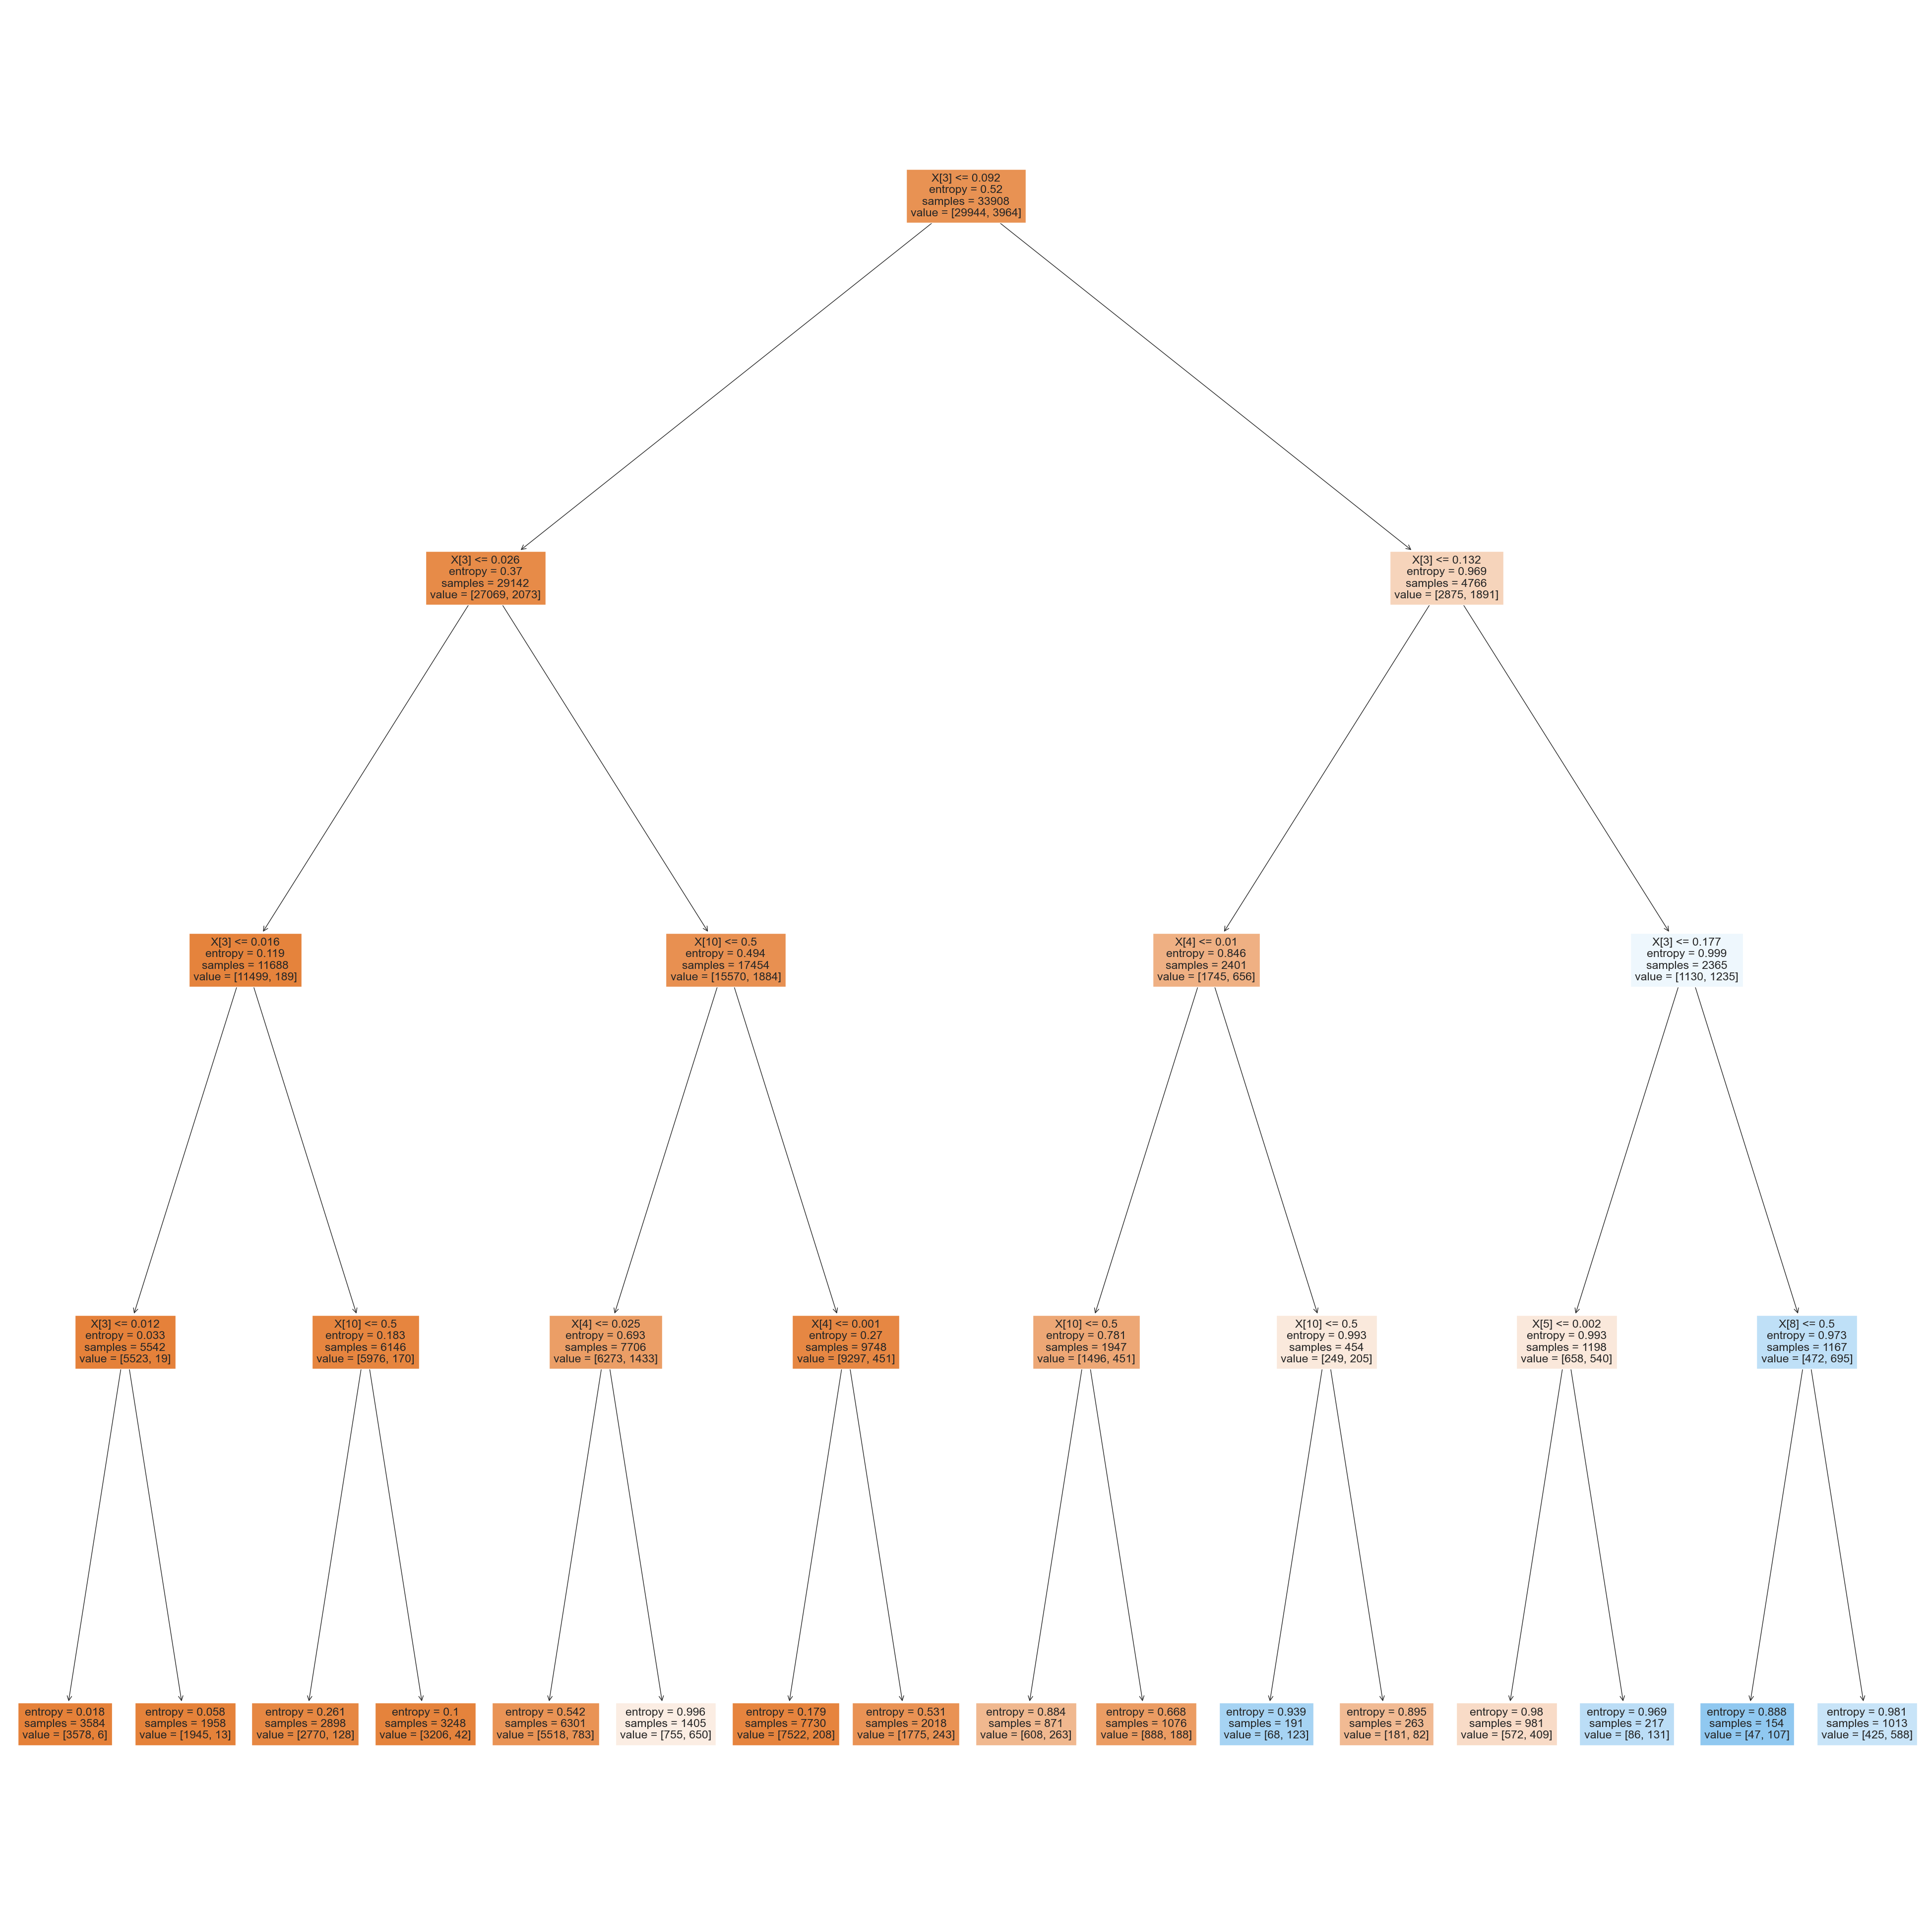

In [223]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(d_classifier,filled=True)

In [217]:
from sklearn.model_selection import GridSearchCV
param = {
    'criterion':['gini', 'entropy'],
    'max_depth':[1,2,3,4,5]

}
clf = GridSearchCV(d_classifier, param, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [218]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [216]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_dt = accuracy_score(y_test, y_pred)
print(accuracy_dt)

[[9805  173]
 [1175  150]]
0.8807396266477926
